# Feature Engineering

In [1]:
import pandas as panditasbb
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = panditasbb.read_csv('twitter_complete_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   default_profile         37438 non-null  int64  
 1   default_profile_image   37438 non-null  int64  
 2   favourites_count        37438 non-null  int64  
 3   followers_count         37438 non-null  int64  
 4   friends_count           37438 non-null  int64  
 5   geo_enabled             37438 non-null  int64  
 6   statuses_count          37438 non-null  int64  
 7   verified                37438 non-null  int64  
 8   average_tweets_per_day  37438 non-null  float64
 9   account_age_days        37438 non-null  int64  
 10  Bot_or_Not              37438 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.1 MB


In [4]:
df.drop(columns=['average_tweets_per_day','account_age_days'], inplace=True)

In [5]:
df.head(4)

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,Bot_or_Not
0,0,0,4,1589,4,0,11041,0,1
1,0,0,536,860,880,0,252,0,0
2,0,0,3307,172,594,1,1001,0,0
3,1,0,8433,517,633,1,1324,0,0


In [6]:
features = list(df.columns)
features

['default_profile',
 'default_profile_image',
 'favourites_count',
 'followers_count',
 'friends_count',
 'geo_enabled',
 'statuses_count',
 'verified',
 'Bot_or_Not']

In [7]:
from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(x)
data = panditasbb.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [8]:
data = data.sample(frac=1)

In [9]:
data.head(5)

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,Bot_or_Not
2649,0.0,0.0,0.002339,8.138672e-07,0.000014,0.0,0.001069,0.0,1.0
18321,1.0,0.0,0.000154,6.165660e-07,0.000058,1.0,0.000011,0.0,1.0
13067,0.0,0.0,0.007201,7.472780e-06,0.000313,1.0,0.020158,0.0,1.0
28321,0.0,0.0,0.002904,2.153871e-06,0.000000,0.0,0.011246,0.0,1.0
3271,0.0,0.0,0.001416,9.042968e-08,0.000000,1.0,0.000682,0.0,1.0


# Entrenar modelos

In [139]:
X = data.drop('Bot_or_Not', axis=1)
y = data.Bot_or_Not

In [140]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [89]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  
logreg.fit(X_train, y_train)

LogisticRegression()

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # el 3 es el hiperparametro
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_jobs=5, random_state=42)
RFC.fit(X_train, y_train)  

RandomForestClassifier(n_jobs=5, random_state=42)

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [61]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

## Modelos predict

In [136]:
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_RFC = RFC.predict(X_test)
#y_pred_nb = nb.predict(X_test)
#y_pred_svc = svclassifier.predict(X_test)

## Matrices de confusión y reportes

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Logistic Regression

In [74]:
print(f'Confusion Matrix --> Logistic Regression:\n{confusion_matrix(y_test,y_pred_logreg)}')
print(f'Classification Report --> Logistic Regression:\n{classification_report(y_test,y_pred_logreg)}')

Confusion Matrix --> Logistic Regression:
[[4233  750]
 [1128 1377]]
Classification Report --> Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      4983
         1.0       0.65      0.55      0.59      2505

    accuracy                           0.75      7488
   macro avg       0.72      0.70      0.71      7488
weighted avg       0.74      0.75      0.74      7488



#### KNN

In [75]:
print(f'Confusion Matrix --> K-Neighbors Classifier:\n{confusion_matrix(y_test,y_pred_knn)}')
print(f'Classification Report --> K-Neighbors Classifier:\n{classification_report(y_test,y_pred_knn)}')

Confusion Matrix --> K-Neighbors Classifier:
[[4464  519]
 [ 674 1831]]
Classification Report --> K-Neighbors Classifier:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      4983
         1.0       0.78      0.73      0.75      2505

    accuracy                           0.84      7488
   macro avg       0.82      0.81      0.82      7488
weighted avg       0.84      0.84      0.84      7488



#### Random Forest

In [142]:
cf_matrix = confusion_matrix(y_test,y_pred_RFC)
print(f'Confusion Matrix --> Random Forest Classifier:\n{cf_matrix}')
print(f'Classification Report --> Random Forest Classifier:\n{classification_report(y_test,y_pred_RFC)}')

Confusion Matrix --> Random Forest Classifier:
[[3511 1461]
 [1765  751]]
Classification Report --> Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69      4972
         1.0       0.34      0.30      0.32      2516

    accuracy                           0.57      7488
   macro avg       0.50      0.50      0.50      7488
weighted avg       0.56      0.57      0.56      7488



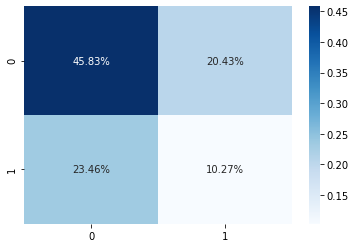

In [54]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Naive Bayes

In [22]:
print(f'Confusion Matrix --> Naive Bayes:\n{confusion_matrix(y_test,y_pred_nb)}')
print(f'Classification Report --> Naive Bayes:\n{classification_report(y_test,y_pred_nb)}')

Confusion Matrix --> Naive Bayes:
[[3105 1850]
 [ 341 2192]]
Classification Report --> Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.90      0.63      0.74      4955
         1.0       0.54      0.87      0.67      2533

    accuracy                           0.71      7488
   macro avg       0.72      0.75      0.70      7488
weighted avg       0.78      0.71      0.71      7488



#### SVM

In [23]:
print(f'Confusion Matrix --> SVM:\n{confusion_matrix(y_test,y_pred_svc)}')
print(f'Classification Report --> SVM:\n{classification_report(y_test,y_pred_svc)}')

Confusion Matrix --> SVM:
[[4176  779]
 [1148 1385]]
Classification Report --> SVM:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81      4955
         1.0       0.64      0.55      0.59      2533

    accuracy                           0.74      7488
   macro avg       0.71      0.69      0.70      7488
weighted avg       0.74      0.74      0.74      7488



## Cross val (mean y std)

In [24]:
tamano_test = 0.20
seed = 30 # no existe un dato exacto para saber el número de seed
scoring = 'accuracy'
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=tamano_test, random_state=seed)

modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

resultados = []
nombres = []
for nombre, modelo in modelos:
    kfold = KFold(n_splits = 2, random_state=seed) # el número de splits es las veces que corre el modelo
    cv_resultados = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring = scoring)
    resultados.append(cv_resultados)
    nombres.append(nombre)
    print(f'{nombre}, {cv_resultados.mean()},({cv_resultados.std()})')

/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR, 0.7499165275459099,(0.0002671118530884753)
KNN, 0.8408681135225375,(0.0002671118530884753)


/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC, 0.8648080133555927,(0.0013021702838063032)
NB, 0.721135225375626,(0.010617696160267087)


/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM, 0.746677796327212,(0.0006343906510851149)


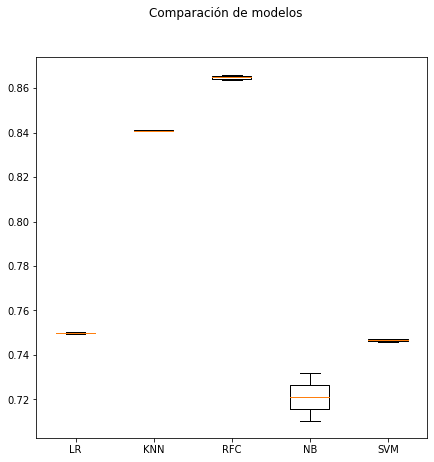

In [25]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Comparación de modelos')
ax = fig.add_subplot()
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

## Let's put their name to test

#### Getting and cleaning data

In [26]:
test_data = panditasbb.read_csv('botometer_to_test.csv')
test_data

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,23,8,2,0,0,3792,0,0
1,322,8,34,0,0,407226,0,0
2,171,86,1933,0,0,15668,1,0
3,3374,9,15,0,0,5087,1,0
4,7,2,1,0,0,2813,0,0
...,...,...,...,...,...,...,...,...
2680,3020,790,1707,0,1,4671,0,0
2681,4074,4239,4777,1,1,712,0,0
2682,17014,2610,7765,1,1,17452,0,0
2683,367516,20245,10282,1,1,158301,0,0


In [27]:
x_test_data = test_data.values
min_max_scaler = preprocessing.MinMaxScaler()
scaler_test_data = min_max_scaler.fit(x_test_data)
data_test = panditasbb.DataFrame(scaler_test_data.transform(test_data), index=test_data.index, columns=test_data.columns)

data_test

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,1.243970e-06,0.000062,0.000004,0.0,0.0,0.001829,0.0,0.0
1,1.741558e-05,0.000062,0.000073,0.0,0.0,0.196804,0.0,0.0
2,9.248647e-06,0.000668,0.004177,0.0,0.0,0.007568,1.0,0.0
3,1.824850e-04,0.000070,0.000032,0.0,0.0,0.002455,1.0,0.0
4,3.785996e-07,0.000016,0.000002,0.0,0.0,0.001356,0.0,0.0
...,...,...,...,...,...,...,...,...
2680,1.633387e-04,0.006137,0.003689,0.0,1.0,0.002254,0.0,0.0
2681,2.203450e-04,0.032928,0.010323,1.0,1.0,0.000340,0.0,0.0
2682,9.202133e-04,0.020274,0.016780,1.0,1.0,0.008431,0.0,0.0
2683,1.987734e-02,0.157260,0.022220,1.0,1.0,0.076501,0.0,0.0


In [28]:
data_test = data_test.sample(frac=1)
data_test.head(10)

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
2474,2.612878e-04,0.002750,0.002734,0.0,1.0,0.001134,0.0,0.0
2636,3.341412e-04,0.021501,0.030866,0.0,1.0,0.009268,0.0,0.0
277,2.163426e-07,0.000047,0.000177,0.0,0.0,0.003761,1.0,0.0
2252,1.883803e-04,0.015784,0.028619,1.0,1.0,0.001013,0.0,0.0
2662,2.723213e-04,0.004917,0.000169,1.0,1.0,0.041071,0.0,0.0
1005,1.216386e-04,0.016553,0.004246,1.0,1.0,0.002404,0.0,0.0
1011,6.827232e-04,0.001049,0.001372,1.0,1.0,0.006384,0.0,0.0
1207,1.442162e-02,0.010215,0.084771,0.0,1.0,0.000976,0.0,0.0
1934,1.980622e-02,0.006183,0.002302,0.0,1.0,0.009015,0.0,0.0
534,3.910393e-05,0.000000,0.000000,0.0,0.0,0.003724,1.0,0.0


#### Probar en los modelos

In [29]:
from collections import Counter

In [30]:
logreg_tested = logreg.predict(data_test)
c_logreg = Counter(logreg_tested)
c_logreg_dict = dict(c_logreg)
c_logreg_dict

{1.0: 2270, 0.0: 415}

In [31]:
porcentaje_logreg_hoomans = c_logreg_dict[1]/2685*100
porcentaje_logreg_bots = 100-porcentaje_logreg_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_logreg_bots}\nCuentas reales es --> {porcentaje_logreg_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 15.456238361266301
Cuentas reales es --> 84.5437616387337


In [32]:
knn_tested = knn.predict(data_test)
c_knn = Counter(knn_tested)
c_knn_dict = dict(c_knn)
c_knn_dict

{1.0: 2440, 0.0: 245}

In [33]:
porcentaje_knn_hoomans = c_knn_dict[1]/2685*100
porcentaje_knn_bots = 100-porcentaje_knn_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_knn_bots}\nCuentas reales es --> {porcentaje_knn_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 9.124767225325883
Cuentas reales es --> 90.87523277467412


In [143]:
RFC_tested = RFC.predict(data_test)
c_RFC = Counter(RFC_tested)
c_RFC_dict = dict(c_RFC)
c_RFC_dict

{1.0: 2016, 0.0: 669}

In [145]:
porcentaje_RFC_hoomans = c_RFC_dict[1]/2685*100
porcentaje_RFC_bots = 100-porcentaje_RFC_hoomans
print(f'Para RandomForest Classifier el porcentaje estimado es:\nBots --> {porcentaje_RFC_bots}\nCuentas reales es --> {porcentaje_RFC_hoomans}')

Para RandomForest Classifier el porcentaje estimado es:
Bots --> 24.916201117318437
Cuentas reales es --> 75.08379888268156


In [36]:
nb_tested = nb.predict(data_test)
c_nb = Counter(nb_tested)
c_nb_dict = dict(c_nb)
c_nb_dict

{1.0: 1294, 0.0: 1391}

In [37]:
porcentaje_nb_hoomans = c_nb_dict[1]/2685*100
porcentaje_nb_bots = 100-porcentaje_nb_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_nb_bots}\nCuentas reales es --> {porcentaje_nb_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 51.80633147113594
Cuentas reales es --> 48.19366852886406


In [38]:
svc_tested = svclassifier.predict(data_test)
c_svc = Counter(svc_tested)
c_svc_dict = dict(c_svc)
c_svc_dict

{0.0: 2019, 1.0: 666}

In [39]:
porcentaje_svc_hoomans = c_svc_dict[1]/2685*100
porcentaje_svc_bots = 100-porcentaje_svc_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_svc_bots}\nCuentas reales es --> {porcentaje_svc_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 75.19553072625698
Cuentas reales es --> 24.804469273743017


## Dataset con verificación mixed

In [40]:
mixed_test_data = panditasbb.read_csv('mixed_botometer_to_test.csv')
mixed_test_data

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
0,23,8,2,0,0,3792,0,0
1,322,8,34,0,0,407226,0,0
2,171,86,1933,0,0,15668,1,0
3,3374,9,15,0,0,5087,1,0
4,7,2,1,0,0,2813,0,0
...,...,...,...,...,...,...,...,...
2680,3020,790,1707,0,1,4671,0,0
2681,4074,4239,4777,1,1,712,0,0
2682,17014,2610,7765,1,1,17452,0,0
2683,367516,20245,10282,1,1,158301,0,0


In [41]:
mix_test_data = mixed_test_data.values
min_max_scaler = preprocessing.MinMaxScaler()
scaler_test_data = min_max_scaler.fit(mix_test_data)
mix_data_test = panditasbb.DataFrame(scaler_test_data.transform(mixed_test_data), index=mixed_test_data.index, columns=mixed_test_data.columns)

mix_data_test = mix_data_test.sample(frac=1)
mix_data_test

,followers_count,friends_count,favourites_count,geo_enabled,verified,statuses_count,default_profile,default_profile_image
957,0.000063,0.008172,0.005774,1.0,0.0,0.001649,1.0,0.0
1810,0.003677,0.011978,0.045568,0.0,0.0,0.013431,0.0,0.0
1543,0.001491,0.002307,0.043580,1.0,0.0,0.027134,0.0,0.0
1924,0.000061,0.006867,0.002786,0.0,0.0,0.001015,0.0,0.0
215,0.000002,0.000031,0.000000,0.0,0.0,0.000196,0.0,0.0
...,...,...,...,...,...,...,...,...
2453,0.000425,0.005119,0.005243,1.0,0.0,0.002196,0.0,0.0
824,0.000733,0.030504,0.010730,1.0,0.0,0.006767,0.0,0.0
1104,0.000213,0.014052,0.083710,1.0,0.0,0.009441,0.0,0.0
324,0.000097,0.000054,0.000002,0.0,0.0,0.040854,0.0,0.0


In [42]:
logreg_tested = logreg.predict(mix_data_test)
c_logreg = Counter(logreg_tested)
c_logreg_dict = dict(c_logreg)
c_logreg_dict

{1.0: 1095, 0.0: 1590}

In [43]:
porcentaje_logreg_hoomans = c_logreg_dict[1]/2685*100
porcentaje_logreg_bots = 100-porcentaje_logreg_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_logreg_bots}\nCuentas reales es --> {porcentaje_logreg_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 59.21787709497207
Cuentas reales es --> 40.78212290502793


In [44]:
knn_tested = knn.predict(mix_data_test)
c_knn = Counter(knn_tested)
c_knn_dict = dict(c_knn)
c_knn_dict

{1.0: 1300, 0.0: 1385}

In [45]:
porcentaje_knn_hoomans = c_knn_dict[1]/2685*100
porcentaje_knn_bots = 100-porcentaje_knn_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_knn_bots}\nCuentas reales es --> {porcentaje_knn_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 51.5828677839851
Cuentas reales es --> 48.4171322160149


In [46]:
RFC_tested = RFC.predict(mix_data_test)
c_RFC = Counter(RFC_tested)
c_RFC_dict = dict(c_RFC)
c_RFC_dict

{1.0: 1316, 0.0: 1369}

In [47]:
porcentaje_RFC_hoomans = c_RFC_dict[1]/2685*100
porcentaje_RFC_bots = 100-porcentaje_RFC_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_RFC_bots}\nCuentas reales es --> {porcentaje_RFC_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 50.98696461824954
Cuentas reales es --> 49.01303538175046


In [48]:
nb_tested = nb.predict(mix_data_test)
c_nb = Counter(nb_tested)
c_nb_dict = dict(c_nb)
c_nb_dict

{0.0: 1468, 1.0: 1217}

In [49]:
porcentaje_nb_hoomans = c_nb_dict[1]/2685*100
porcentaje_nb_bots = 100-porcentaje_nb_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_nb_bots}\nCuentas reales es --> {porcentaje_nb_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 54.67411545623836
Cuentas reales es --> 45.32588454376164


In [50]:
svc_tested = svclassifier.predict(mix_data_test)
c_svc = Counter(svc_tested)
c_svc_dict = dict(c_svc)
c_svc_dict

{1.0: 664, 0.0: 2021}

In [51]:
porcentaje_svc_hoomans = c_svc_dict[1]/2685*100
porcentaje_svc_bots = 100-porcentaje_svc_hoomans
print(f'Para Logistic Regression el porcentaje estimado es:\nBots --> {porcentaje_svc_bots}\nCuentas reales es --> {porcentaje_svc_hoomans}')

Para Logistic Regression el porcentaje estimado es:
Bots --> 75.27001862197393
Cuentas reales es --> 24.72998137802607
